# import python libraries


In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression

In [5]:
# import csv file


In [6]:
df = pd.read_csv('Flipkart1.csv', encoding= 'unicode_escape')
df.head()

,Unnamed: 0,Product_Name,Price,Description,Product_Rating
0,0,"vivo X90 (Breeze Blue, 256 GB)","49,990",12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Ful...,4.3
1,1,"Apple iPhone XR (White, 64 GB) (Includes EarPo...","47,900",64 GB ROM15.49 cm (6.1 inch) Display12MP Rear ...,4.6
2,2,"Nothing Phone (2a) 5G (Black, 128 GB)","23,999",8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4
3,3,"vivo T3x 5G (Celestial Green, 128 GB)","13,499",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,4.3
4,4,"SAMSUNG Galaxy A55 5G (Awesome Iceblue, 256 GB)","45,990",12 GB RAM | 256 GB ROM | Expandable Upto 1 TB1...,4.1


In [5]:
df.shape
# Displaying the current present rows and coloums in dataset

(414, 5)

# Getting the info of the dataset present

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      414 non-null    int64  
 1   Product_Name    414 non-null    object 
 2   Price           414 non-null    object 
 3   Description     414 non-null    object 
 4   Product_Rating  414 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 16.3+ KB


# Checking for null values if any present


In [11]:
pd.isnull(df).sum()


Unnamed: 0        0
Product_Name      0
Price             0
Description       0
Product_Rating    0
dtype: int64

# Droping the null values


In [16]:
df.dropna(inplace=True)
df.head()

,Unnamed: 0,Product_Name,Price,Description,Product_Rating
0,0,"vivo X90 (Breeze Blue, 256 GB)","49,990",12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Ful...,4.3
1,1,"Apple iPhone XR (White, 64 GB) (Includes EarPo...","47,900",64 GB ROM15.49 cm (6.1 inch) Display12MP Rear ...,4.6
2,2,"Nothing Phone (2a) 5G (Black, 128 GB)","23,999",8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4
3,3,"vivo T3x 5G (Celestial Green, 128 GB)","13,499",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,4.3
4,4,"SAMSUNG Galaxy A55 5G (Awesome Iceblue, 256 GB)","45,990",12 GB RAM | 256 GB ROM | Expandable Upto 1 TB1...,4.1


# Changing the data type


In [22]:
# Here we have changed the data type of Price coloum from string to int 
df['Price'] = df['Price'].astype(int)


ValueError: invalid literal for int() with base 10: '49,990'

# Viewing the coloums present in dataset

In [31]:
df.columns

Index(['Unnamed: 0', 'Product_Name', 'Price', 'Description', 'Product_Rating'], dtype='object')

# Describing() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)


In [33]:
df.describe()

,Unnamed: 0,Price,Product_Rating
count,414.000000,414.000000,414.000000
mean,206.500000,24453.111111,4.278261
std,119.655756,15418.562481,0.169919
min,0.000000,839.000000,3.600000
25%,103.250000,10492.250000,4.200000
50%,206.500000,22999.000000,4.300000
75%,309.750000,37999.000000,4.400000
max,413.000000,65999.000000,4.800000


# Removing the commas(,) from the price coloum 

In [8]:
# Convert 'Price' column to string
df['Price'] = df['Price'].astype(str)

# Remove commas from 'Price' column
df['Price'] = df['Price'].str.replace(',', '')

# Convert 'Price' column to integer
df['Price'] = df['Price'].astype(int)

df.to_csv('Flipkart1_cleaned.csv', index=False)

# Check the first few rows
df.head()

,Unnamed: 0,Product_Name,Price,Description,Product_Rating
0,0,"vivo X90 (Breeze Blue, 256 GB)",49990,12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Ful...,4.3
1,1,"Apple iPhone XR (White, 64 GB) (Includes EarPo...",47900,64 GB ROM15.49 cm (6.1 inch) Display12MP Rear ...,4.6
2,2,"Nothing Phone (2a) 5G (Black, 128 GB)",23999,8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4
3,3,"vivo T3x 5G (Celestial Green, 128 GB)",13499,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,4.3
4,4,"SAMSUNG Galaxy A55 5G (Awesome Iceblue, 256 GB)",45990,12 GB RAM | 256 GB ROM | Expandable Upto 1 TB1...,4.1


# Reviewing the content's present in "Product_Name" coloum

In [43]:
df['Product_Name'].unique()


array(['vivo x90 (breeze blue, 256 gb)',
       'apple iphone xr (white, 64 gb) (includes earpods, power adapter)',
       'nothing phone (2a) 5g (black, 128 gb)',
       'vivo t3x 5g (celestial green, 128 gb)',
       'samsung galaxy a55 5g (awesome iceblue, 256 gb)',
       'xiaomi 11t pro 5g hyperphone (celestial magic, 256 gb)',
       'vivo v23 pro 5g (stardust black, 256 gb)',
       'oneplus 10 pro 5g (emerald forest, 256 gb)',
       'oneplus 11 5g (eternal green, 128 gb)',
       'apple iphone 8 plus (gold, 64 gb)',
       'realme x50 pro (moss green, 256 gb)',
       'iqoo 11 5g (alpha, 256 gb)',
       'realme x50 pro 5g (rust red, 256 gb)',
       'oneplus 11 5g (titan black, 128 gb)',
       'samsung galaxy s7 (gold platinum, 32 gb)',
       'oppo reno7 pro 5g (starlight black, 256 gb)',
       'oppo reno7 pro 5g (startrails blue, 256 gb)',
       'oppo reno6 pro 5g (aurora, 256 gb)',
       'oppo reno6 pro 5g (majestic gold, 256 gb)',
       'apple iphone 8 plus (silver, 

# Reviewing the content's present in "Description" coloum

In [44]:
df['Description'].unique()


array(['12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Full HD+ Display50MP + 12MP + 12MP | 32MP Front Camera4810 mAh BatteryDimensity 9200 Processor1 Year Handset and 6 Months Accessories',
       '64 GB ROM15.49 cm (6.1 inch) Display12MP Rear Camera | 7MP Front CameraA12 Bionic Chip ProcessoriOS 13 CompatibleBrand Warranty of 1 Year',
       '8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full HD+ Display50MP (OIS) + 50MP | 32MP Front Camera5000 mAh BatteryDimensity 7200 Pro Processor1 Year Manufacturing Warranty',
       '4 GB RAM | 128 GB ROM | Expandable Upto 1 TB17.07 cm (6.72 inch) Full HD+ Display50MP + 2MP | 8MP Front Camera6000 mAh Battery6 Gen 1 Processor1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for Inbox Accessories',
       '12 GB RAM | 256 GB ROM | Expandable Upto 1 TB16.76 cm (6.6 inch) Full HD+ Display50MP + 12MP + 5MP | 32MP Front Camera5000 mAh BatterySamsung Exynos 1480 Processor1 Year Manufacturer Warranty for Device and 6 Months for In-Box Ac

# Coverting the datatypes of Product_Name and Description into Category 


In [50]:
categorical_colms = {'Product_Name':'string', 'Description':'string'}
df = df.astype(categorical_colms)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      414 non-null    int64  
 1   Product_Name    414 non-null    string 
 2   Price           414 non-null    int32  
 3   Description     414 non-null    string 
 4   Product_Rating  414 non-null    float64
dtypes: float64(1), int32(1), int64(1), string(2)
memory usage: 14.7 KB


# Converting the Product_Name coloum content into lower Case format

In [41]:
df['Product_Name'] = df['Product_Name'].str.lower()
df.head()

,Unnamed: 0,Product_Name,Price,Description,Product_Rating
0,0,"vivo x90 (breeze blue, 256 gb)",49990,12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Ful...,4.3
1,1,"apple iphone xr (white, 64 gb) (includes earpo...",47900,64 GB ROM15.49 cm (6.1 inch) Display12MP Rear ...,4.6
2,2,"nothing phone (2a) 5g (black, 128 gb)",23999,8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4
3,3,"vivo t3x 5g (celestial green, 128 gb)",13499,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,4.3
4,4,"samsung galaxy a55 5g (awesome iceblue, 256 gb)",45990,12 GB RAM | 256 GB ROM | Expandable Upto 1 TB1...,4.1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      414 non-null    int64   
 1   Product_Name    414 non-null    category
 2   Price           414 non-null    int32   
 3   Description     414 non-null    category
 4   Product_Rating  414 non-null    float64 
dtypes: category(2), float64(1), int32(1), int64(1)
memory usage: 30.0 KB


# Removing new lines using regex

In [51]:

df['Description'] = df['Description'].replace('\n', '', regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      414 non-null    int64  
 1   Product_Name    414 non-null    string 
 2   Price           414 non-null    int32  
 3   Description     414 non-null    string 
 4   Product_Rating  414 non-null    float64
dtypes: float64(1), int32(1), int64(1), string(2)
memory usage: 14.7 KB


# Removing alpha-numeric words from Description coloum


In [53]:
df['Description'] = df['Description'].apply(lambda x: ' '.join([word for word in x.split() if not any(char.isdigit() for char in word)]))
df['Description'] = df['Description'].astype('string')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      414 non-null    int64  
 1   Product_Name    414 non-null    string 
 2   Price           414 non-null    int32  
 3   Description     414 non-null    string 
 4   Product_Rating  414 non-null    float64
dtypes: float64(1), int32(1), int64(1), string(2)
memory usage: 14.7 KB


# Removing extra spaces from end as well as from in between from Product_Name and Description coloum


In [34]:
df['Product_Name'] = df['Product_Name'].apply(lambda x: ' '.join(x.strip().split()))
df['Product_Name'] = df['Product_Name'].astype('string')

df['Description'] = df['Description'].apply(lambda x: ' '.join(x.strip().split()))
df['Description'] = df['Description'].astype('string')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      414 non-null    int64  
 1   Product_Name    414 non-null    string 
 2   Price           414 non-null    object 
 3   Description     414 non-null    string 
 4   Product_Rating  414 non-null    float64
 5   Product_Camera  414 non-null    object 
dtypes: float64(1), int64(1), object(2), string(2)
memory usage: 19.5+ KB


,Unnamed: 0,Product_Name,Price,Description,Product_Rating,Product_Camera
0,0,"vivo X90 (Breeze Blue, 256 GB)","49,990",12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Ful...,4.3,"Rear: None MP, Front: 32 MP"
1,1,"Apple iPhone XR (White, 64 GB) (Includes EarPo...","47,900",64 GB ROM15.49 cm (6.1 inch) Display12MP Rear ...,4.6,"Rear: 12 MP, Front: 7 MP"
2,2,"Nothing Phone (2a) 5G (Black, 128 GB)","23,999",8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4,"Rear: None MP, Front: 32 MP"
3,3,"vivo T3x 5G (Celestial Green, 128 GB)","13,499",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,4.3,"Rear: None MP, Front: 8 MP"
4,4,"SAMSUNG Galaxy A55 5G (Awesome Iceblue, 256 GB)","45,990",12 GB RAM | 256 GB ROM | Expandable Upto 1 TB1...,4.1,"Rear: None MP, Front: 32 MP"


# Removing any special characters from "Product_Name" and "Description" coloum



In [81]:
df = pd.read_csv("Flipkart1.csv")
Products = df["Product_Name"].tolist()



for i in Products:
    clean1 = ""
    clean2 = ""
    clean3 = ""
    for j in i.split("("):
        clean1 = clean1 + j
    for j in clean1.split(")"):
        clean2 = clean2 + j
    for j in clean2.split(","):
        clean3 = clean3 + j

    print(clean3)


vivo X90 Breeze Blue 256 GB
Apple iPhone XR White 64 GB Includes EarPods Power Adapter
Nothing Phone 2a 5G Black 128 GB
vivo T3x 5G Celestial Green 128 GB
SAMSUNG Galaxy A55 5G Awesome Iceblue 256 GB
Xiaomi 11T Pro 5G Hyperphone Celestial Magic 256 GB
vivo V23 Pro 5G Stardust Black 256 GB
OnePlus 10 Pro 5G Emerald Forest 256 GB
OnePlus 11 5G Eternal Green 128 GB
Apple iPhone 8 Plus Gold 64 GB
realme X50 Pro Moss Green 256 GB
IQOO 11 5G Alpha 256 GB
realme X50 Pro 5G Rust Red 256 GB
OnePlus 11 5G Titan Black 128 GB
SAMSUNG Galaxy S7 Gold Platinum 32 GB
OPPO Reno7 Pro 5G Starlight Black 256 GB
OPPO Reno7 Pro 5G Startrails Blue 256 GB
OPPO Reno6 Pro 5G Aurora 256 GB
OPPO Reno6 Pro 5G Majestic Gold 256 GB
Apple iPhone 8 Plus Silver 64 GB
Apple iPhone 8 Plus Space Grey 64 GB
vivo X60 Midnight Black 256 GB
OnePlus 12R Cool Blue 256 GB
OnePlus 9 Pro 5G Pine Green 256 GB
vivo V30 Pro 5G Classic Black 256 GB
Apple iPhone 12 Black 64 GB
Nothing Phone 2a 5G Black 128 GB
vivo T3x 5G Crimson Bliss 

In [4]:
df = pd.read_csv("Flipkart1.csv")
Products = df["Description"].tolist()



for i in Products:
    clean1 = ""
    clean2 = ""
    clean3 = ""
    for j in i.split("("):
        clean1 = clean1 + j
    for j in clean1.split(")"):
        clean2 = clean2 + j
    for j in clean2.split("|"):
        clean3 = clean3 + j

    print(clean3)


12 GB RAM  256 GB ROM17.22 cm 6.78 inch Full HD+ Display50MP + 12MP + 12MP  32MP Front Camera4810 mAh BatteryDimensity 9200 Processor1 Year Handset and 6 Months Accessories
64 GB ROM15.49 cm 6.1 inch Display12MP Rear Camera  7MP Front CameraA12 Bionic Chip ProcessoriOS 13 CompatibleBrand Warranty of 1 Year
8 GB RAM  128 GB ROM17.02 cm 6.7 inch Full HD+ Display50MP OIS + 50MP  32MP Front Camera5000 mAh BatteryDimensity 7200 Pro Processor1 Year Manufacturing Warranty
4 GB RAM  128 GB ROM  Expandable Upto 1 TB17.07 cm 6.72 inch Full HD+ Display50MP + 2MP  8MP Front Camera6000 mAh Battery6 Gen 1 Processor1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for Inbox Accessories
12 GB RAM  256 GB ROM  Expandable Upto 1 TB16.76 cm 6.6 inch Full HD+ Display50MP + 12MP + 5MP  32MP Front Camera5000 mAh BatterySamsung Exynos 1480 Processor1 Year Manufacturer Warranty for Device and 6 Months for In-Box Accessories
12 GB RAM  256 GB ROM16.94 cm 6.67 inch Display108MP Rear Cam

In [9]:
df = pd.read_csv('Flipkart1.csv')
df.head()

,Unnamed: 0,Product_Name,Price,Description,Product_Rating
0,0,"vivo X90 (Breeze Blue, 256 GB)","49,990",12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Ful...,4.3
1,1,"Apple iPhone XR (White, 64 GB) (Includes EarPo...","47,900",64 GB ROM15.49 cm (6.1 inch) Display12MP Rear ...,4.6
2,2,"Nothing Phone (2a) 5G (Black, 128 GB)","23,999",8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4
3,3,"vivo T3x 5G (Celestial Green, 128 GB)","13,499",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,4.3
4,4,"SAMSUNG Galaxy A55 5G (Awesome Iceblue, 256 GB)","45,990",12 GB RAM | 256 GB ROM | Expandable Upto 1 TB1...,4.1


# Seperating the major terms required for doing analysis from the dataset

# Split the "Product_Name" column by the first space to separate the company name

In [26]:
df['Company'] = df['Product_Name'].str.split(' ', 1).str[0]

# Save the changes back to the dataset
df.to_csv('Flipkart1_with_company.csv', index=False)

# Display the first few rows to verify the new column
df.head()



,Unnamed: 0,Product_Name,Price,Description,Product_Rating,Product_Display,Company
0,0,"vivo X90 (Breeze Blue, 256 GB)","49,990",12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Ful...,4.3,17.22,vivo
1,1,"Apple iPhone XR (White, 64 GB) (Includes EarPo...","47,900",64 GB ROM15.49 cm (6.1 inch) Display12MP Rear ...,4.6,15.49,Apple
2,2,"Nothing Phone (2a) 5G (Black, 128 GB)","23,999",8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4,17.02,Nothing
3,3,"vivo T3x 5G (Celestial Green, 128 GB)","13,499",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,4.3,17.07,vivo
4,4,"SAMSUNG Galaxy A55 5G (Awesome Iceblue, 256 GB)","45,990",12 GB RAM | 256 GB ROM | Expandable Upto 1 TB1...,4.1,16.76,SAMSUNG


In [35]:
df.to_excel('output.xlsx', index=False)

# Creating seperate column for "Product_color"

In [27]:
# Load the cleaned dataset
df = pd.read_csv('Flipkart1.csv')

# Define a function to extract color from product name
def extract_color(product_name):
    colors = ['Black', 'White', 'Blue', 'Breeze Blue' 'Red', 'Green', 'Gold', 'Silver', 'Grey', 'Pink', 'Purple', 'Yellow', 'Orange' , 'Iceblue']
    color_found = None
    for color in colors:
        if re.search(rf'\b{color}\b', product_name, flags=re.IGNORECASE):
            if color_found:
                # If multiple colors are found, return None
                return None
            color_found = color
    return color_found

# Apply the function to create the Product_Color column
df['Product_Color'] = df['Product_Name'].apply(extract_color)

# Save the updated dataset
df.to_csv('Flipkart1_with_color.csv', index=False)
df.head()

,Unnamed: 0,Product_Name,Price,Description,Product_Rating,Product_Color
0,0,"vivo X90 (Breeze Blue, 256 GB)","49,990",12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Ful...,4.3,Blue
1,1,"Apple iPhone XR (White, 64 GB) (Includes EarPo...","47,900",64 GB ROM15.49 cm (6.1 inch) Display12MP Rear ...,4.6,White
2,2,"Nothing Phone (2a) 5G (Black, 128 GB)","23,999",8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4,Black
3,3,"vivo T3x 5G (Celestial Green, 128 GB)","13,499",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,4.3,Green
4,4,"SAMSUNG Galaxy A55 5G (Awesome Iceblue, 256 GB)","45,990",12 GB RAM | 256 GB ROM | Expandable Upto 1 TB1...,4.1,Iceblue


In [6]:
df.to_excel('output1.xlsx', index=False)

# Creating seperate column for "Product_gb"


In [14]:
# Load the cleaned dataset
df = pd.read_csv('Flipkart1.csv')

# Define a function to extract storage capacity from product name
def extract_storage_capacity(product_name):
    pattern = r'(\d+)\s*GB'
    match = re.search(pattern, product_name, flags=re.IGNORECASE)
    if match:
        return int(match.group(1))
    return None

# Apply the function to create the Product_gb column
df['Product_gb'] = df['Product_Name'].apply(extract_storage_capacity)

# Save the updated dataset
df.to_csv('Flipkart1_with_gb.csv', index=False)
df.head()

,Unnamed: 0,Product_Name,Price,Description,Product_Rating,Product_gb
0,0,"vivo X90 (Breeze Blue, 256 GB)","49,990",12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Ful...,4.3,256.0
1,1,"Apple iPhone XR (White, 64 GB) (Includes EarPo...","47,900",64 GB ROM15.49 cm (6.1 inch) Display12MP Rear ...,4.6,64.0
2,2,"Nothing Phone (2a) 5G (Black, 128 GB)","23,999",8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4,128.0
3,3,"vivo T3x 5G (Celestial Green, 128 GB)","13,499",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,4.3,128.0
4,4,"SAMSUNG Galaxy A55 5G (Awesome Iceblue, 256 GB)","45,990",12 GB RAM | 256 GB ROM | Expandable Upto 1 TB1...,4.1,256.0


# Creating seperate column for "Product_Ram"


In [17]:
# Load the cleaned dataset
df = pd.read_csv('Flipkart1.csv')

# Define a function to extract RAM capacity from product name
def extract_ram_capacity(product_name):
    pattern = r'(\d+)\s*GB\s*RAM'
    match = re.search(pattern, product_name, flags=re.IGNORECASE)
    if match:
        return int(match.group(1))
    return None

# Apply the function to create the Product_Ram column
df['Product_Ram'] = df['Description'].apply(extract_ram_capacity)

# Save the updated dataset
df.to_csv('Flipkart1_with_ram.csv', index=False)
df.head()

,Unnamed: 0,Product_Name,Price,Description,Product_Rating,Product_Ram
0,0,"vivo X90 (Breeze Blue, 256 GB)","49,990",12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Ful...,4.3,12.0
1,1,"Apple iPhone XR (White, 64 GB) (Includes EarPo...","47,900",64 GB ROM15.49 cm (6.1 inch) Display12MP Rear ...,4.6,NaN
2,2,"Nothing Phone (2a) 5G (Black, 128 GB)","23,999",8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4,8.0
3,3,"vivo T3x 5G (Celestial Green, 128 GB)","13,499",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,4.3,4.0
4,4,"SAMSUNG Galaxy A55 5G (Awesome Iceblue, 256 GB)","45,990",12 GB RAM | 256 GB ROM | Expandable Upto 1 TB1...,4.1,12.0


#  Creating seperate column for "Product_Display"


In [23]:
# Load the cleaned dataset
df = pd.read_csv('Flipkart1.csv')

# Define a function to extract screen size from description
def extract_screen_size(description):
    pattern = r'(\d+(\.\d+)?)\s*(?:inches|inch|in|cm)'
    match = re.search(pattern, description, flags=re.IGNORECASE)
    if match:
        return float(match.group(1))
    return None

# Apply the function to create the Product_Display column
df['Product_Display'] = df['Description'].apply(extract_screen_size)

# Save the updated dataset
df.to_csv('Flipkart1_with_display.csv', index=False)
df.head()

,Unnamed: 0,Product_Name,Price,Description,Product_Rating,Product_Display
0,0,"vivo X90 (Breeze Blue, 256 GB)","49,990",12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Ful...,4.3,17.22
1,1,"Apple iPhone XR (White, 64 GB) (Includes EarPo...","47,900",64 GB ROM15.49 cm (6.1 inch) Display12MP Rear ...,4.6,15.49
2,2,"Nothing Phone (2a) 5G (Black, 128 GB)","23,999",8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4,17.02
3,3,"vivo T3x 5G (Celestial Green, 128 GB)","13,499",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,4.3,17.07
4,4,"SAMSUNG Galaxy A55 5G (Awesome Iceblue, 256 GB)","45,990",12 GB RAM | 256 GB ROM | Expandable Upto 1 TB1...,4.1,16.76


# Creating seperate column for "Product_Battery"

In [31]:
# Load the cleaned dataset
df = pd.read_csv('Flipkart1.csv')

# Define a function to extract battery capacity from description
def extract_battery_capacity(description):
    pattern = r'(\d+)\s*mAh\s*battery'
    match = re.search(pattern, description, flags=re.IGNORECASE)
    if match:
        return int(match.group(1))
    return None

# Apply the function to create the Product_Battery column
df['Product_Battery'] = df['Description'].apply(extract_battery_capacity)

# Save the updated dataset
df.to_csv('Flipkart1_with_battery.csv', index=False)
df.head()

,Unnamed: 0,Product_Name,Price,Description,Product_Rating,Product_Battery
0,0,"vivo X90 (Breeze Blue, 256 GB)","49,990",12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Ful...,4.3,4810.0
1,1,"Apple iPhone XR (White, 64 GB) (Includes EarPo...","47,900",64 GB ROM15.49 cm (6.1 inch) Display12MP Rear ...,4.6,NaN
2,2,"Nothing Phone (2a) 5G (Black, 128 GB)","23,999",8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4,5000.0
3,3,"vivo T3x 5G (Celestial Green, 128 GB)","13,499",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,4.3,6000.0
4,4,"SAMSUNG Galaxy A55 5G (Awesome Iceblue, 256 GB)","45,990",12 GB RAM | 256 GB ROM | Expandable Upto 1 TB1...,4.1,5000.0


In [4]:
df.to_excel('output2.xlsx', index=False)

# Creating seperate column for "Product_Camera"

In [32]:
# Load the cleaned dataset
df = pd.read_csv('Flipkart1.csv')

# Define a function to extract camera megapixels from description
def extract_camera(description):
    rear_pattern = r'(\d+)\s*MP\s*rear\s*camera'
    front_pattern = r'(\d+)\s*MP\s*front\s*camera'
    
    rear_match = re.search(rear_pattern, description, flags=re.IGNORECASE)
    front_match = re.search(front_pattern, description, flags=re.IGNORECASE)

    rear_megapixels = rear_match.group(1) if rear_match else None
    front_megapixels = front_match.group(1) if front_match else None

    return f"Rear: {rear_megapixels} MP, Front: {front_megapixels} MP"

# Apply the function to create the Product_Camera column
df['Product_Camera'] = df['Description'].apply(extract_camera)

# Save the updated dataset
df.to_csv('Flipkart1_with_camera.csv', index=False)
df.head()

,Unnamed: 0,Product_Name,Price,Description,Product_Rating,Product_Camera
0,0,"vivo X90 (Breeze Blue, 256 GB)","49,990",12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Ful...,4.3,"Rear: None MP, Front: 32 MP"
1,1,"Apple iPhone XR (White, 64 GB) (Includes EarPo...","47,900",64 GB ROM15.49 cm (6.1 inch) Display12MP Rear ...,4.6,"Rear: 12 MP, Front: 7 MP"
2,2,"Nothing Phone (2a) 5G (Black, 128 GB)","23,999",8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4,"Rear: None MP, Front: 32 MP"
3,3,"vivo T3x 5G (Celestial Green, 128 GB)","13,499",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,4.3,"Rear: None MP, Front: 8 MP"
4,4,"SAMSUNG Galaxy A55 5G (Awesome Iceblue, 256 GB)","45,990",12 GB RAM | 256 GB ROM | Expandable Upto 1 TB1...,4.1,"Rear: None MP, Front: 32 MP"


# Analyzing Pricing Trend

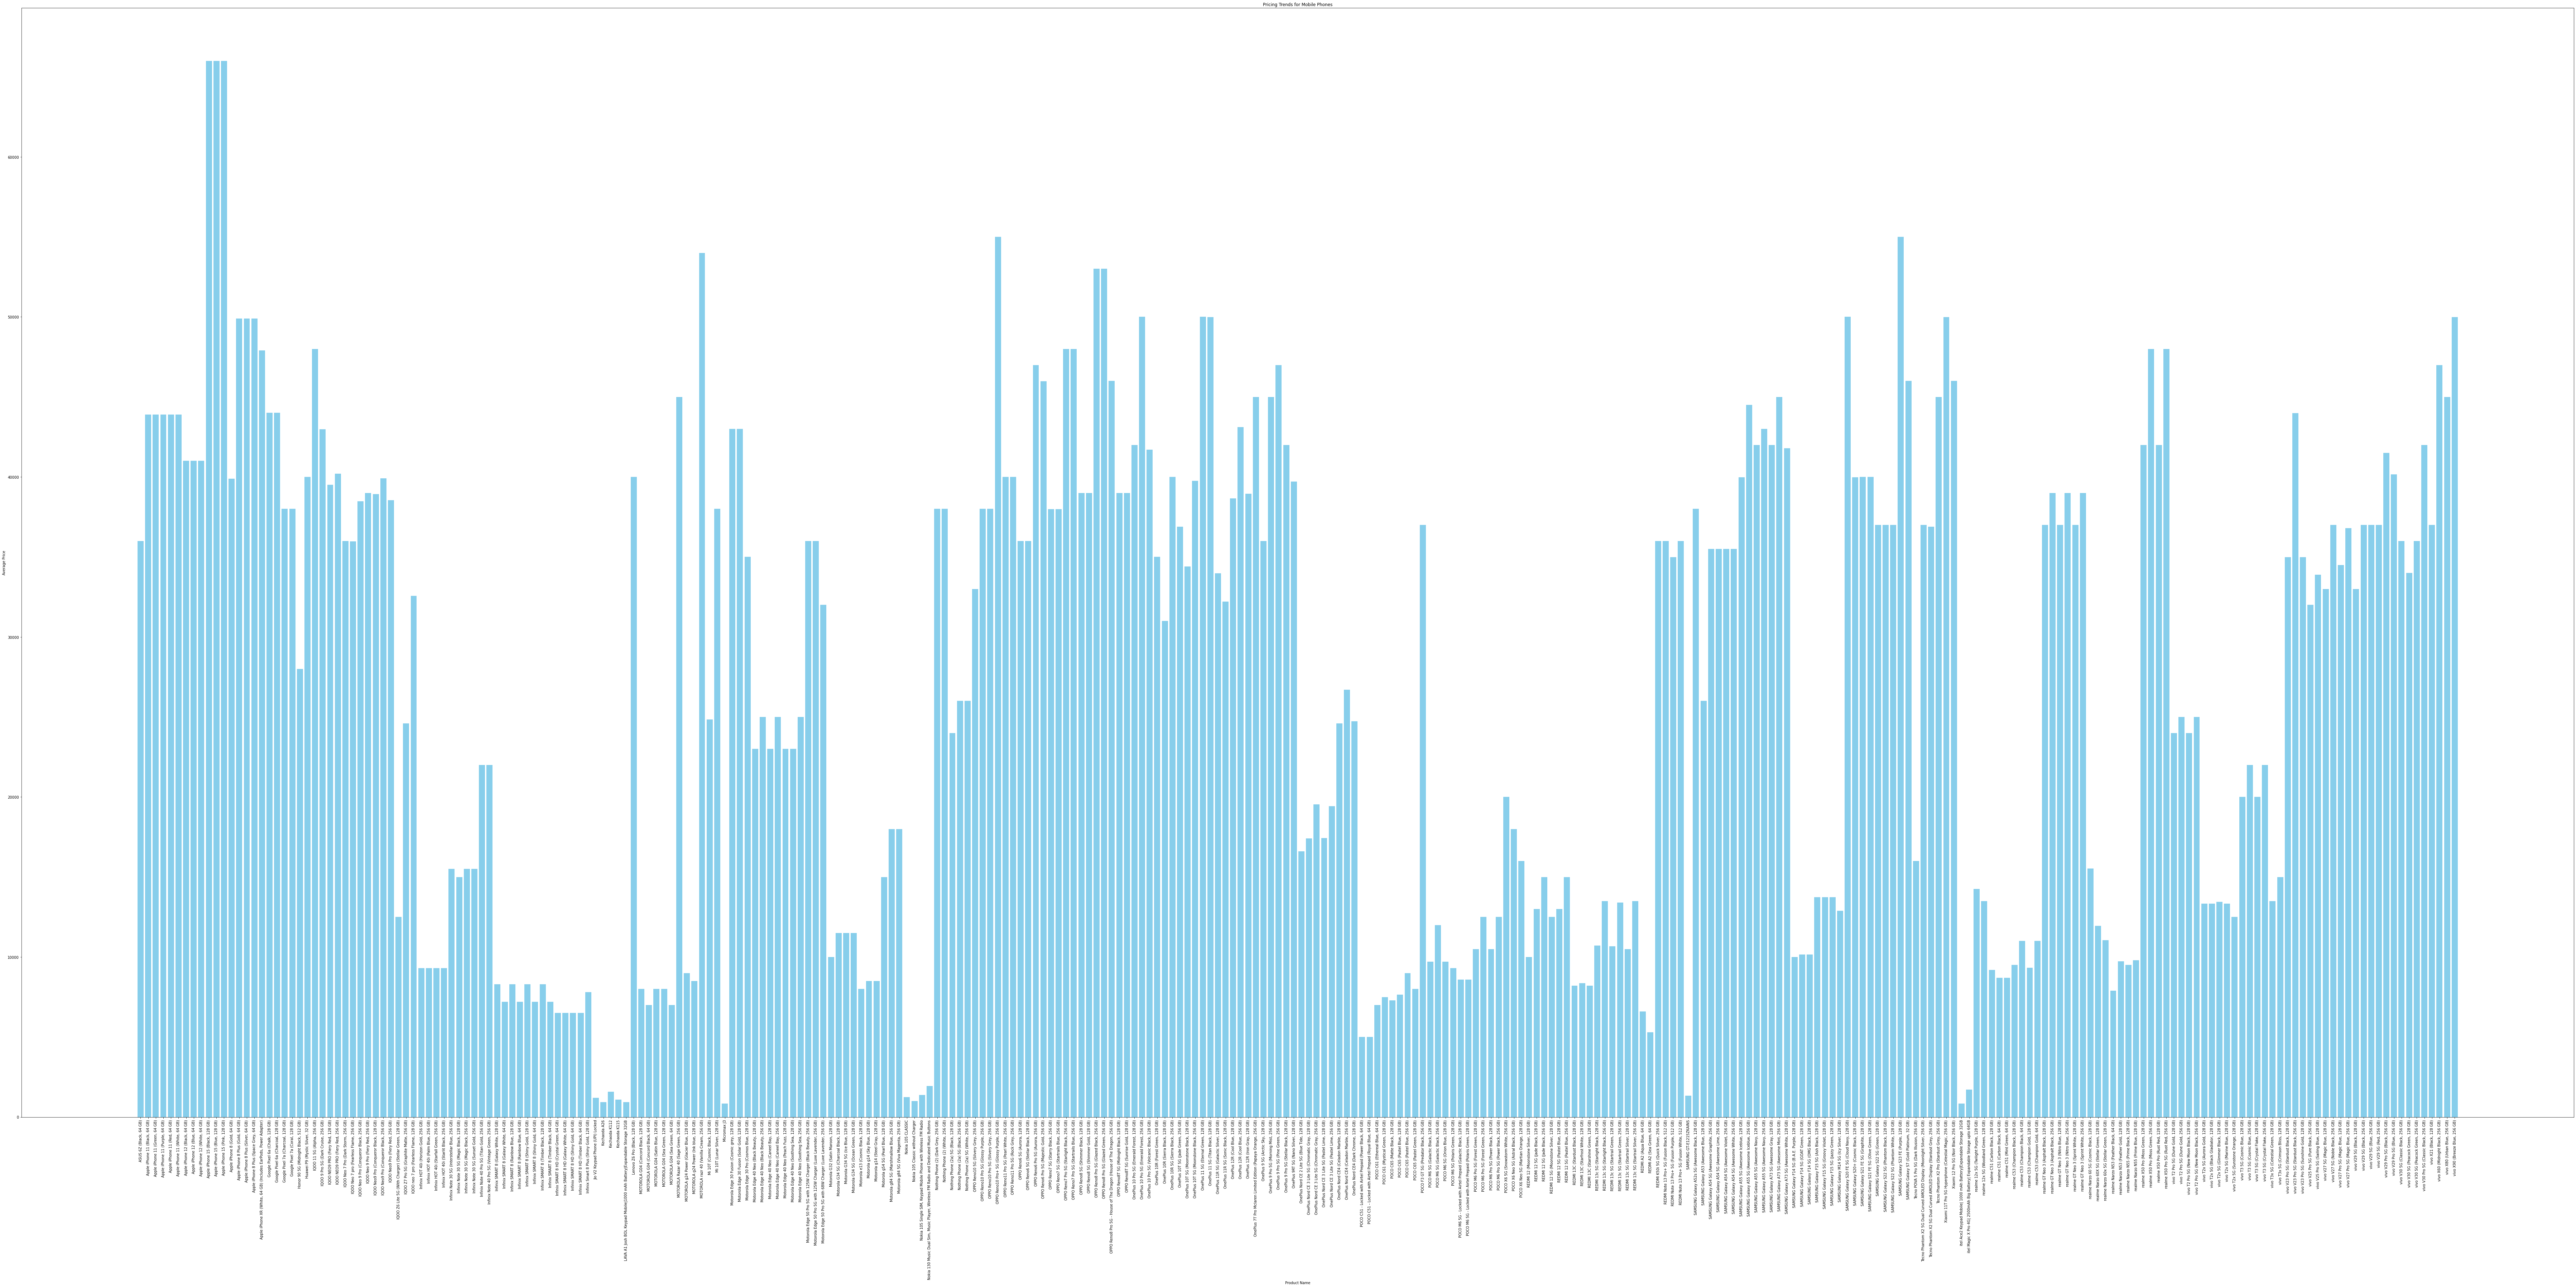

In [13]:
# removing the commas(,) from the price coloum 

df['Price'] = df['Price'].astype(str)

# Remove commas from 'Price' column
df['Price'] = df['Price'].str.replace(',', '')

# Convert 'Price' column to integer
df['Price'] = df['Price'].astype(int)

df.to_csv('Flipkart1_cleaned.csv', index=False)



# Group by Product_Name and calculate the mean price for each product
price_trends = df.groupby('Product_Name')['Price'].mean().reset_index()

# Plotting
plt.figure(figsize=(100, 50))
plt.bar(price_trends['Product_Name'], price_trends['Price'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Average Price')
plt.title('Pricing Trends for Mobile Phones')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [31]:
# Perform value_counts on the "Product_Name" column
product_counts = df['Product_Name'].value_counts()

print(product_counts)


Nothing Phone (2a) 5G (Black, 128 GB)          18
vivo T3x 5G (Celestial Green, 128 GB)          11
vivo T3x 5G (Crimson Bliss, 128 GB)             7
vivo T2x 5G (Black Gladiator, 128 GB)           3
POCO M6 5G (Galactic Black, 128 GB)             3
                                               ..
OPPO Reno8T 5G (Midnight Black, 128 GB)         1
vivo X21 (Black, 128 GB)                        1
OPPO Reno10 Pro+ 5G (Glossy Purple, 256 GB)     1
OPPO Reno8T 5G (Sunrise Gold, 128 GB)           1
Nokia 105 CLASSIC                               1
Name: Product_Name, Length: 306, dtype: int64


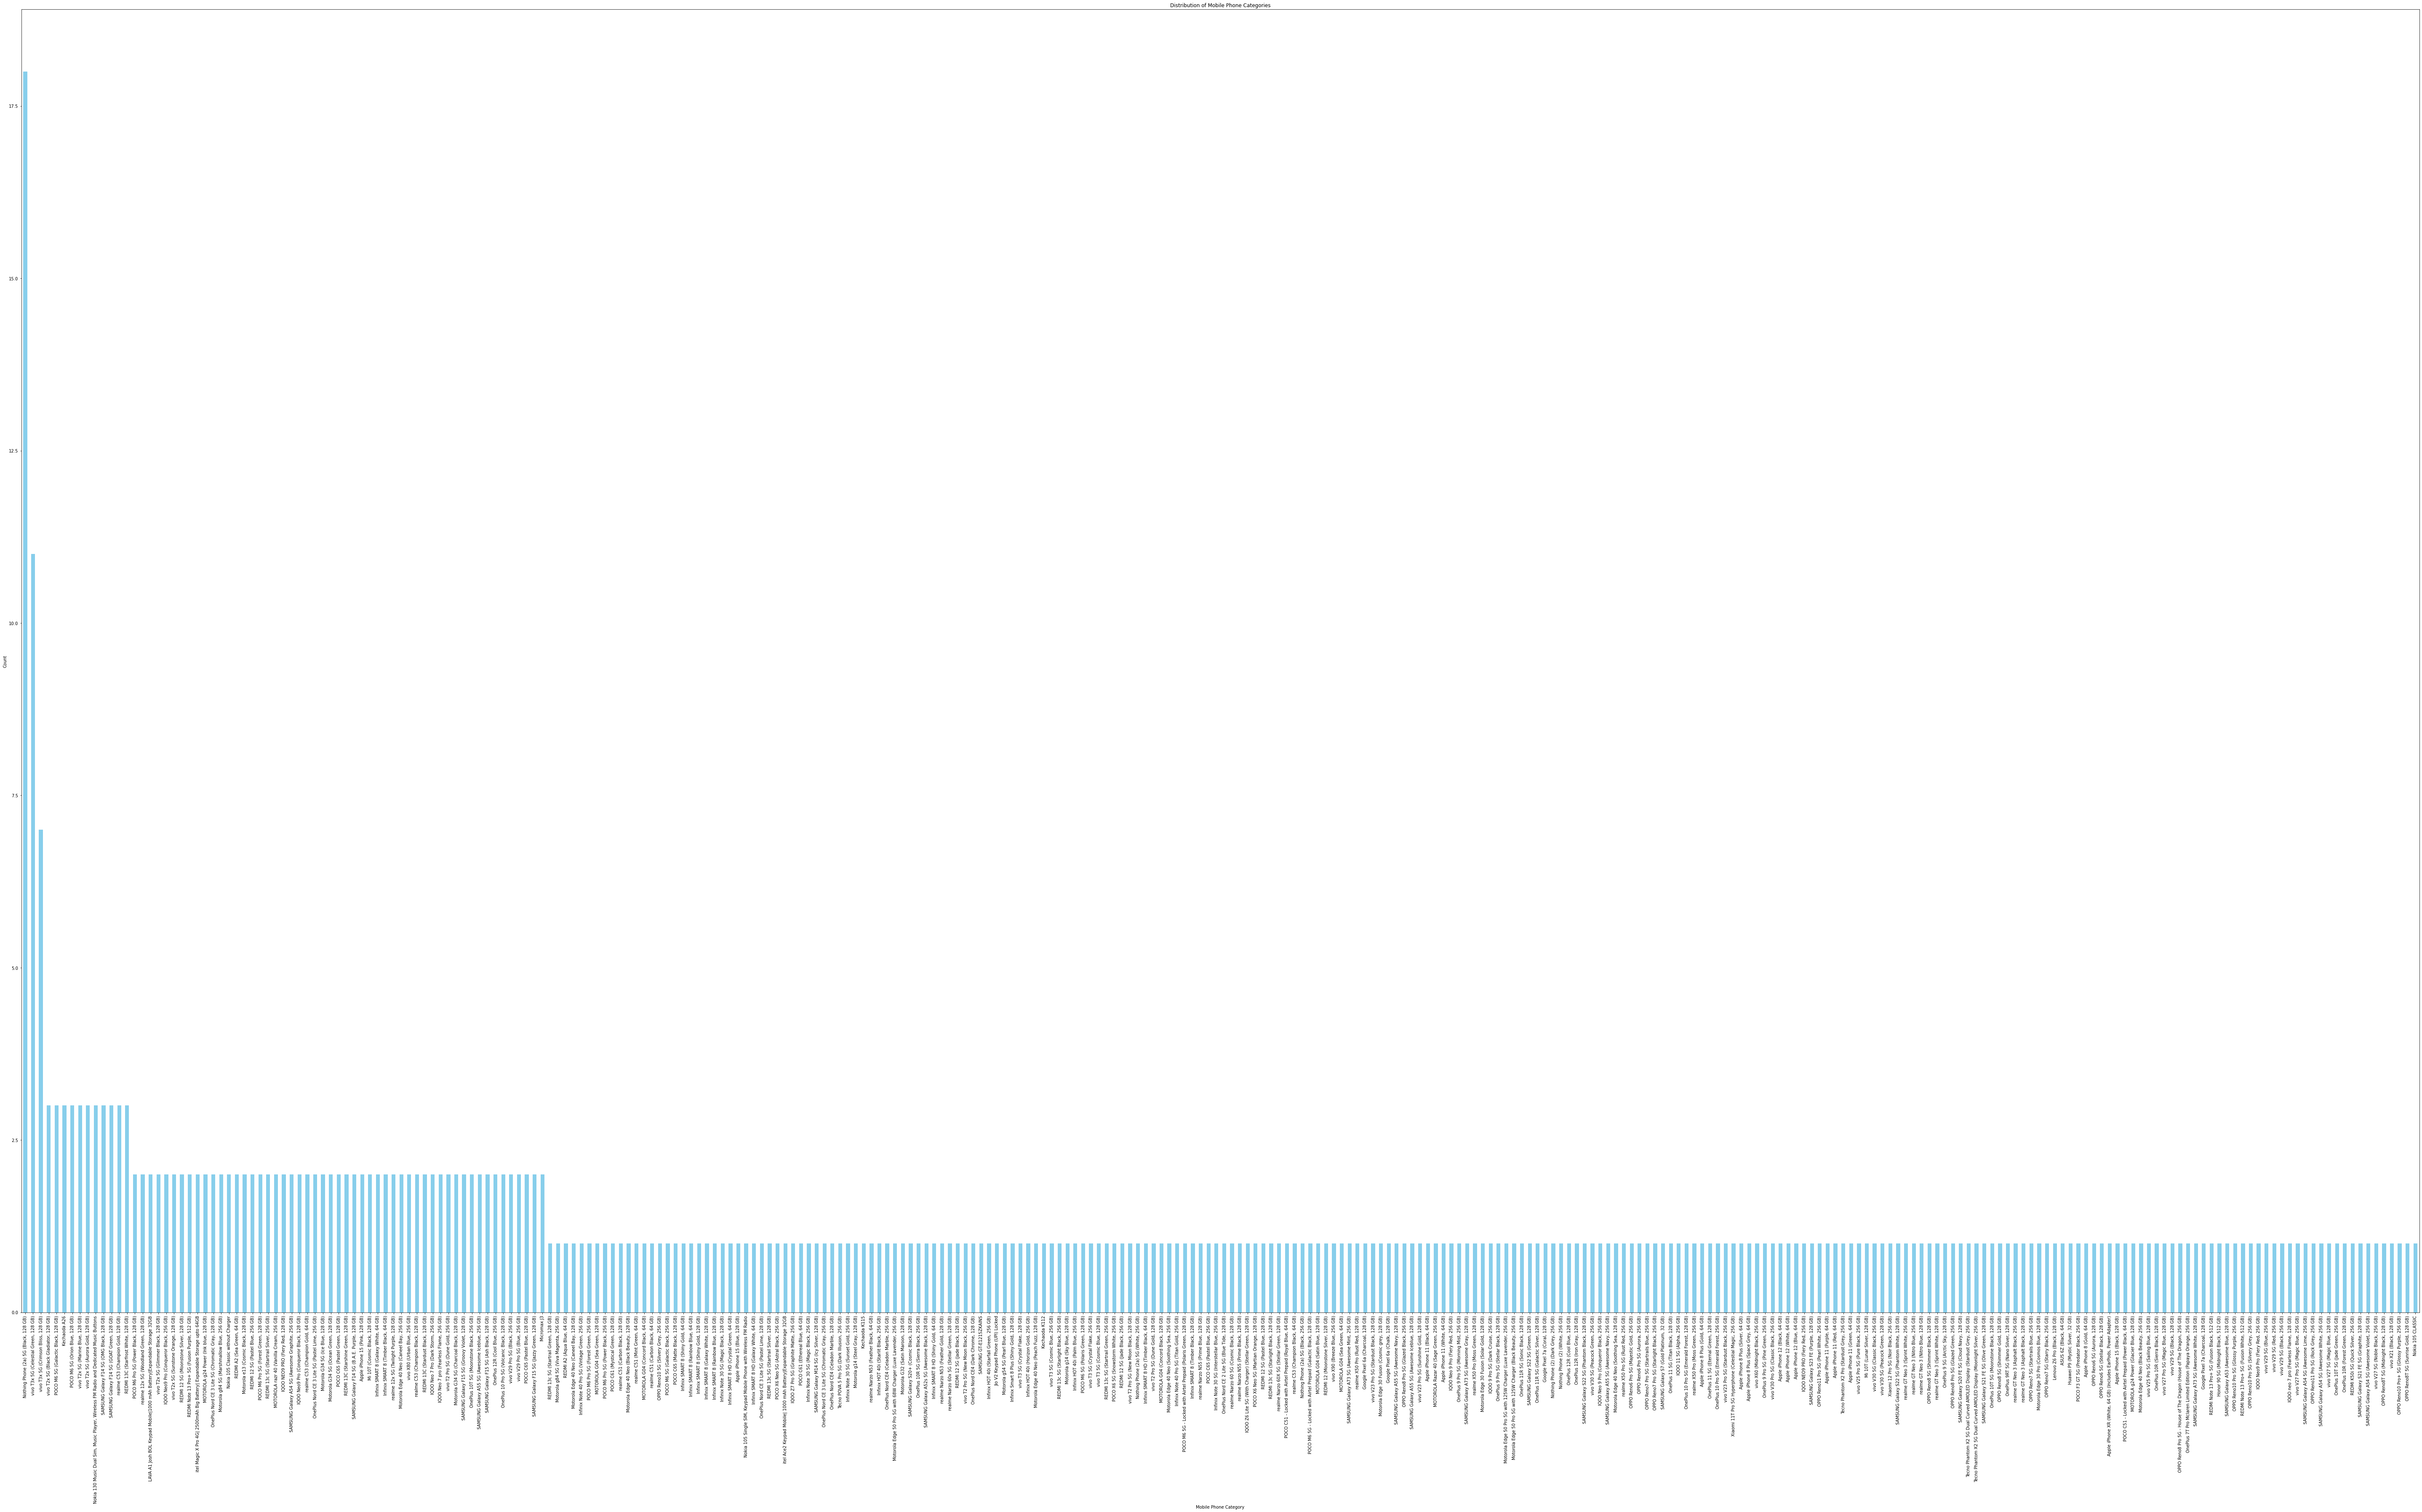

In [39]:
# Count the number of occurrences of each category in the "Product_Name" column
category_counts = df['Product_Name'].value_counts()

# Plotting
plt.figure(figsize=(80, 50))
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Mobile Phone Category')
plt.ylabel('Count')
plt.title('Distribution of Mobile Phone Categories')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Analyzing  Product Rating 

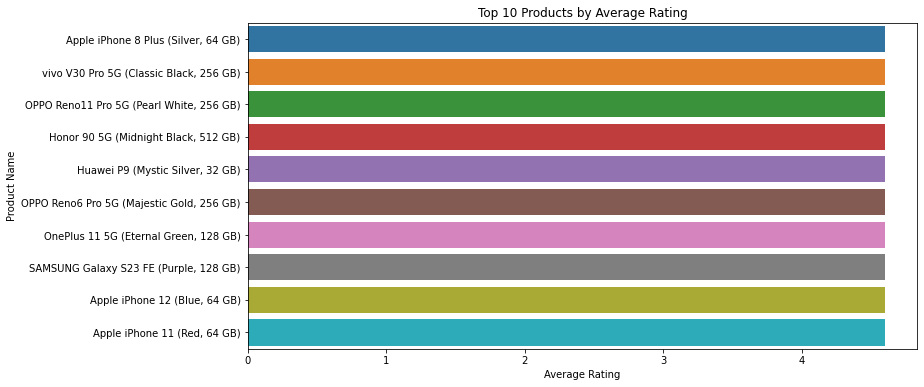

In [9]:
# Group by product name and calculate the average rating
average_ratings = df.groupby('Product_Name')['Product_Rating'].mean().reset_index()

# Sort the products by average rating
sorted_ratings = average_ratings.sort_values(by='Product_Rating', ascending=False)

# Plot the top N products by average rating
top_n = 10
plt.figure(figsize=(12, 6))
sns.barplot(x='Product_Rating', y='Product_Name', data=sorted_ratings.head(top_n))
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.title('Top {} Products by Average Rating'.format(top_n))
plt.show()


# Analyzing Popular Products

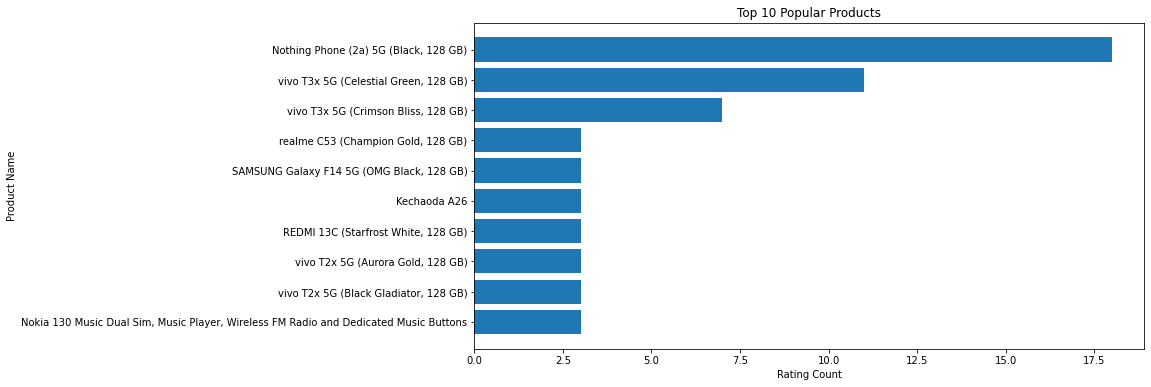

In [11]:
# Group by product name and calculate the average rating and count the number of ratings
product_ratings = df.groupby('Product_Name').agg({'Product_Rating': ['mean', 'count']}).reset_index()

# Rename the columns for better readability
product_ratings.columns = ['Product_Name', 'Average_Rating', 'Rating_Count']

# Sort the products by rating count and average rating
popular_products = product_ratings.sort_values(by=['Rating_Count', 'Average_Rating'], ascending=False)

# Display the top N popular products
top_n = 10
top_products = popular_products.head(top_n)

# Plot the top N popular products
plt.figure(figsize=(12, 6))
plt.barh(top_products['Product_Name'], top_products['Rating_Count'])
plt.xlabel('Rating Count')
plt.ylabel('Product Name')
plt.title('Top {} Popular Products'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to display the most popular product at the top
plt.show()

# Analyzing Pricing Strategies

C:\Users\Prashant\AppData\Local\Temp\ipykernel_8924\1896211343.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Price'] = pd.to_numeric(df['Price'].str.replace('[^\d.]', ''), errors='coerce')


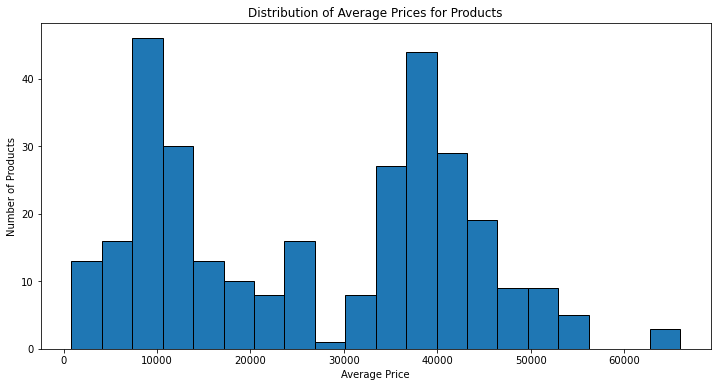

In [12]:
# Convert price to numeric (remove any non-numeric characters)
df['Price'] = pd.to_numeric(df['Price'].str.replace('[^\d.]', ''), errors='coerce')

# Group by product name and calculate the average price
average_price = df.groupby('Product_Name')['Price'].mean().reset_index()

# Sort the products by average price
sorted_prices = average_price.sort_values(by='Price', ascending=False)

# Plot the pricing strategies
plt.figure(figsize=(12, 6))
plt.hist(sorted_prices['Price'], bins=20, edgecolor='black')
plt.xlabel('Average Price')
plt.ylabel('Number of Products')
plt.title('Distribution of Average Prices for Products')
plt.show()